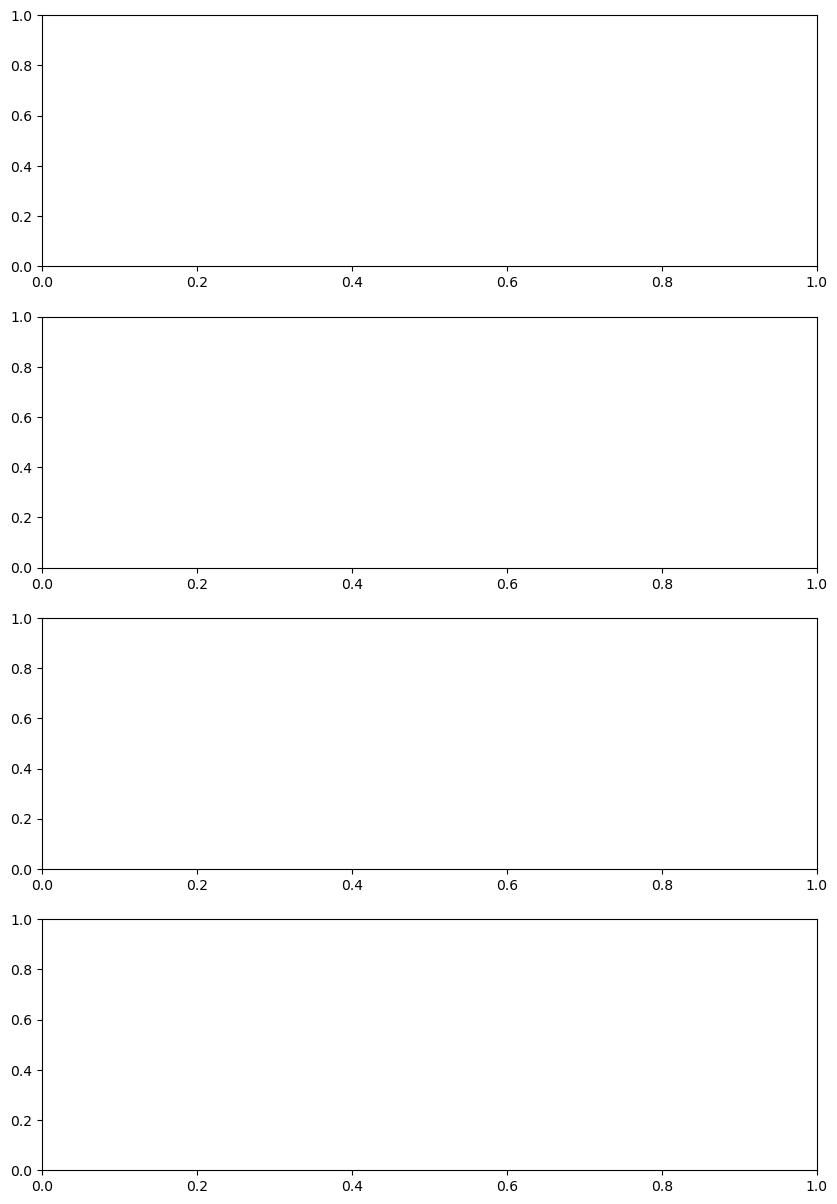

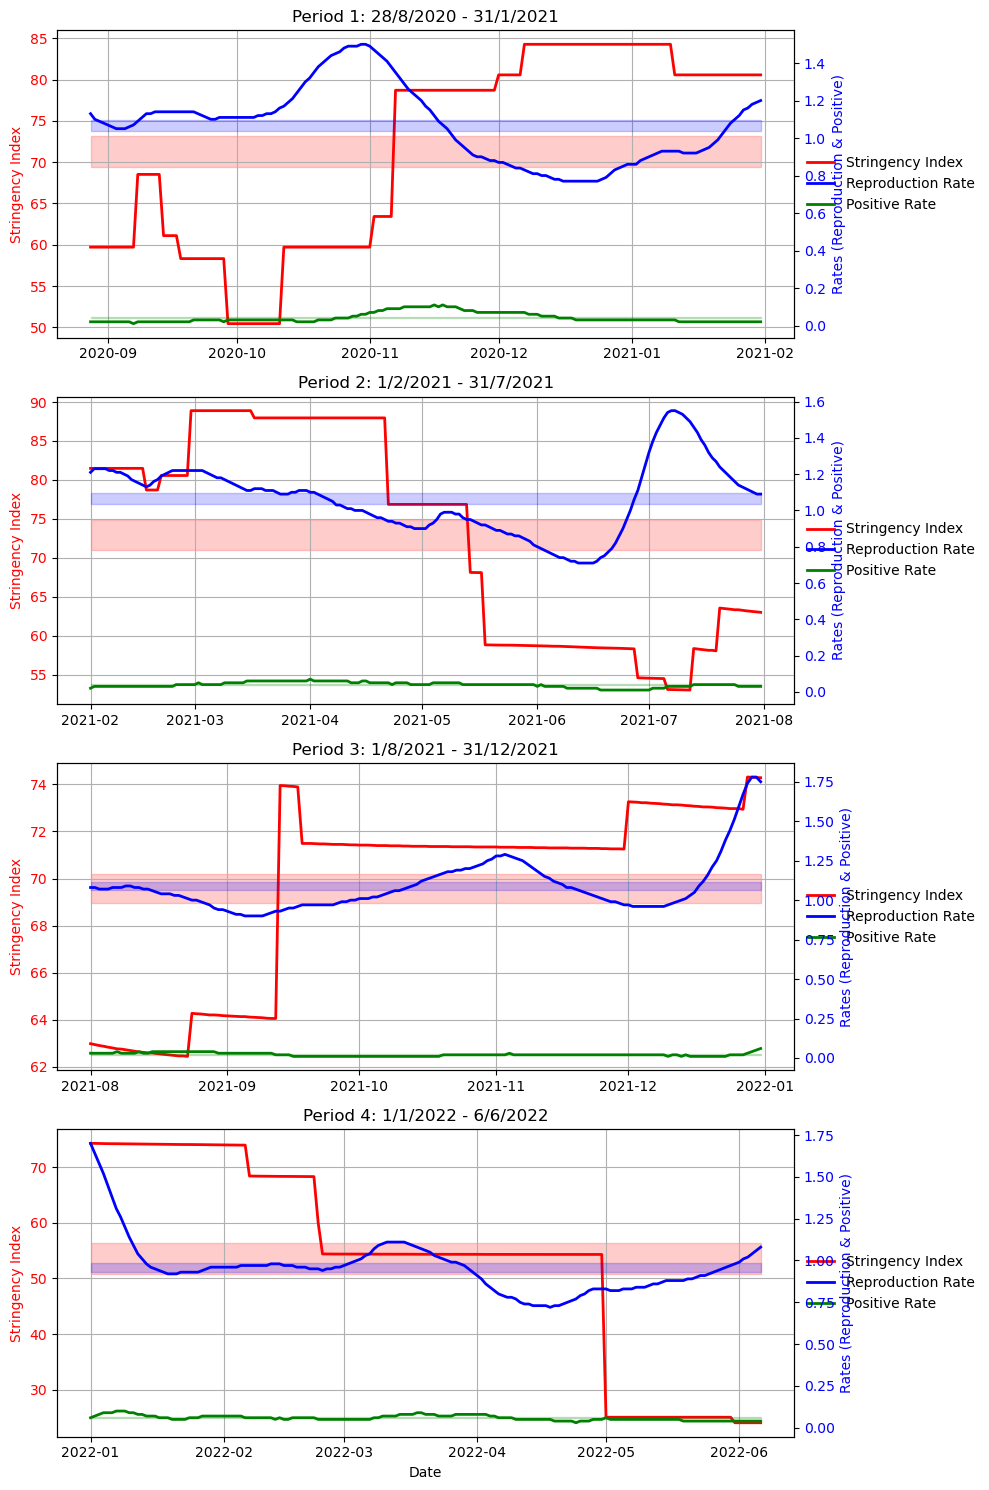

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import norm  # <-- Add this import
import numpy as np


# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods
periods = [
    ('2020-08-28', '2021-01-31'),
    ('2021-02-01', '2021-07-31'),
    ('2021-08-01', '2021-12-31'),
    ('2022-01-01', '2022-06-06')
]

# Create the subplots (4 rows and 1 column)
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# Titles for each period
titles = [
    'Period 1: 28/8/2020 - 31/1/2021',
    'Period 2: 1/2/2021 - 31/7/2021',
    'Period 3: 1/8/2021 - 31/12/2021',
    'Period 4: 1/1/2022 - 6/6/2022'
]

 


# Define confidence level
confidence_level = 0.95
Z = norm.ppf(1 - (1 - confidence_level) / 2)

# Function to calculate confidence intervals
def calculate_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data) / np.sqrt(n)
    margin_of_error = Z * std_err
    return mean, mean - margin_of_error, mean + margin_of_error

# Create the subplots (4 rows and 1 column)
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# Titles for each period
titles = [
    'Period 1: 28/8/2020 - 31/1/2021',
    'Period 2: 1/2/2021 - 31/7/2021',
    'Period 3: 1/8/2021 - 31/12/2021',
    'Period 4: 1/1/2022 - 6/6/2022'
]

# Loop over each period to create the corresponding plot
for i, (start_date, end_date) in enumerate(periods):
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Calculate confidence intervals for stringency_index, reproduction_rate, and positive_rate
    mean_str, lower_str, upper_str = calculate_ci(period_df['stringency_index'])
    mean_rep, lower_rep, upper_rep = calculate_ci(period_df['reproduction_rate'])
    mean_pos, lower_pos, upper_pos = calculate_ci(period_df['positive_rate'])

    # Plot for stringency_index on the left axis
    axs[i].plot(period_df['date'], period_df['stringency_index'], label='Stringency Index', color='red', linewidth=2)
    axs[i].fill_between(period_df['date'], lower_str, upper_str, color='red', alpha=0.2)
    axs[i].set_ylabel('Stringency Index', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    axs[i].set_title(titles[i])
    axs[i].grid(True)
    
    # Create a second y-axis for reproduction_rate and positive_rate
    ax2 = axs[i].twinx()
    ax2.plot(period_df['date'], period_df['reproduction_rate'], label='Reproduction Rate', color='blue', linewidth=2)
    ax2.fill_between(period_df['date'], lower_rep, upper_rep, color='blue', alpha=0.2)
    
    ax2.plot(period_df['date'], period_df['positive_rate'], label='Positive Rate', color='green', linewidth=2)
    ax2.fill_between(period_df['date'], lower_pos, upper_pos, color='green', alpha=0.2)
    
    ax2.set_ylabel('Rates (Reproduction & Positive)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Legend handling for both axes
    lines_1, labels_1 = axs[i].get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    axs[i].legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Set labels for the bottom plot's x-axis
axs[-1].set_xlabel('Date')

# Adjust layout to ensure no overlap
plt.tight_layout()

# Show the plot
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

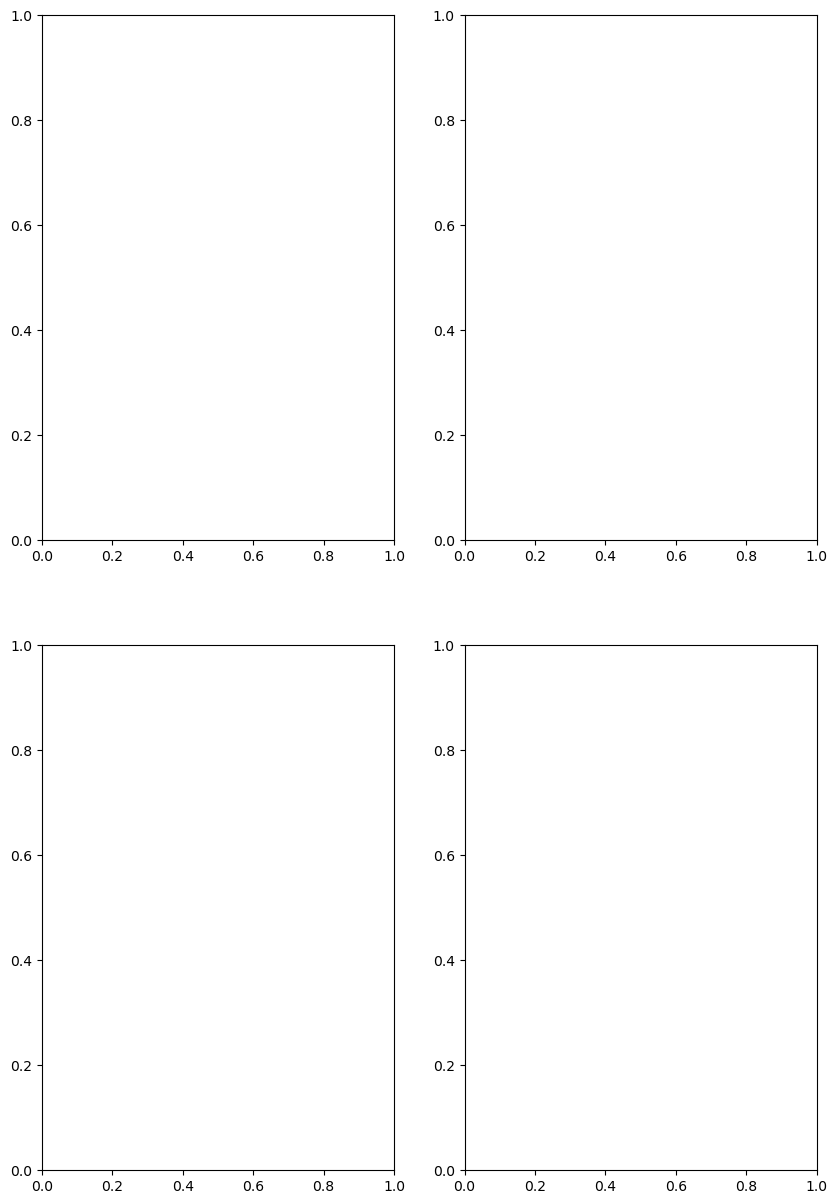

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import norm  # <-- Add this import
import numpy as np


# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods
periods = [
    ('2020-08-28', '2021-01-31'),
    ('2021-02-01', '2021-07-31'),
    ('2021-08-01', '2021-12-31'),
    ('2022-01-01', '2022-06-06')
]

# Create the subplots (4 rows and 1 column)
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

# Titles for each period
titles = [
    'Period 1: 28/8/2020 - 31/1/2021',
    'Period 2: 1/2/2021 - 31/7/2021',
    'Period 3: 1/8/2021 - 31/12/2021',
    'Period 4: 1/1/2022 - 6/6/2022'
]

# Loop over each period to create the corresponding plot
for i, (start_date, end_date) in enumerate(periods):
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Plot for stringency_index on the left axis
    axs[i].plot(period_df['date'], period_df['stringency_index'], label='Stringency Index', color='red', linewidth=2)
    axs[i].set_ylabel('Stringency Index', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    axs[i].set_title(titles[i])
    axs[i].grid(True)
    
    # Create a second y-axis for reproduction_rate and positive_rate
    ax2 = axs[i].twinx()
    ax2.plot(period_df['date'], period_df['reproduction_rate'], label='Reproduction Rate', color='blue', linewidth=2)
    ax2.plot(period_df['date'], period_df['positive_rate'], label='Positive Rate', color='green', linewidth=2)
    
    ax2.set_ylabel('Rates (Reproduction & Positive)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Legend handling for both axes
    lines_1, labels_1 = axs[i].get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    axs[i].legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Set labels for the bottom plot's x-axis
axs[-1].set_xlabel('Date')

# Adjust layout to ensure no overlap
plt.tight_layout()

# Show the plot
plt.show()


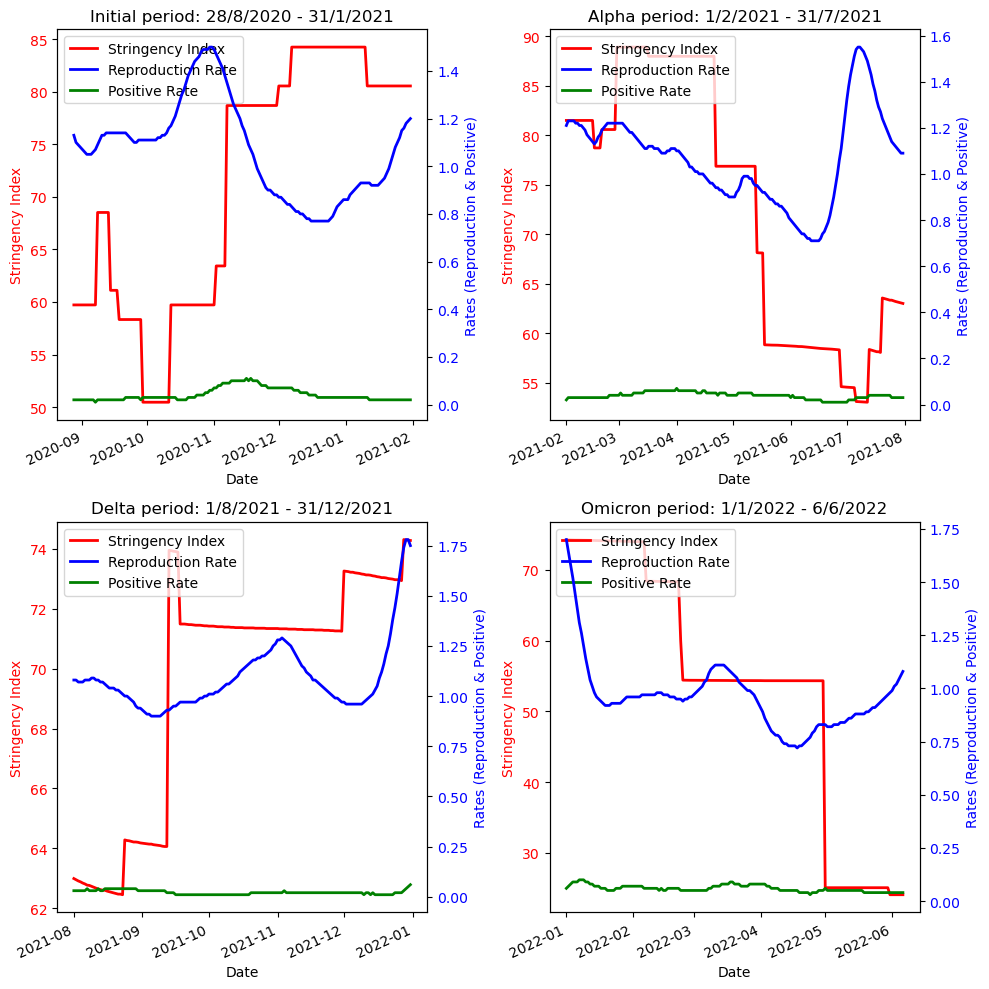

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import norm  # <-- Add this import
import numpy as np


# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods
periods = [
    ('2020-08-28', '2021-01-31'),
    ('2021-02-01', '2021-07-31'),
    ('2021-08-01', '2021-12-31'),
    ('2022-01-01', '2022-06-06')
]

# Create the subplots (2 rows and 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Titles for each period
titles = [
    'Initial period: 28/8/2020 - 31/1/2021',
    'Alpha period: 1/2/2021 - 31/7/2021',
    'Delta period: 1/8/2021 - 31/12/2021',
    'Omicron period: 1/1/2022 - 6/6/2022'
]

# Loop over each period to create the corresponding plot
for i, (start_date, end_date) in enumerate(periods):
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Plot for stringency_index on the left axis
    axs[i // 2, i % 2].plot(period_df['date'], period_df['stringency_index'], label='Stringency Index', color='red', linewidth=2)
    axs[i // 2, i % 2].set_ylabel('Stringency Index', color='red')
    axs[i // 2, i % 2].tick_params(axis='y', labelcolor='red')
    axs[i // 2, i % 2].set_title(titles[i])
    axs[i // 2, i % 2].grid(False)
    
    # Create a second y-axis for reproduction_rate and positive_rate
    ax2 = axs[i // 2, i % 2].twinx()
    ax2.plot(period_df['date'], period_df['reproduction_rate'], label='Reproduction Rate', color='blue', linewidth=2)
    ax2.plot(period_df['date'], period_df['positive_rate'], label='Positive Rate', color='green', linewidth=2)
    
    ax2.set_ylabel('Rates (Reproduction & Positive)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Legend handling for both axes
    lines_1, labels_1 = axs[i // 2, i % 2].get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    axs[i // 2, i % 2].legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Set labels for the bottom plot's x-axis
for ax in axs.flat:
    ax.set_xlabel('Date')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=25, ha='right')  # Rotate x-axis labels

# Adjust layout to ensure no overlap
plt.tight_layout()

# Show the plot
plt.show()


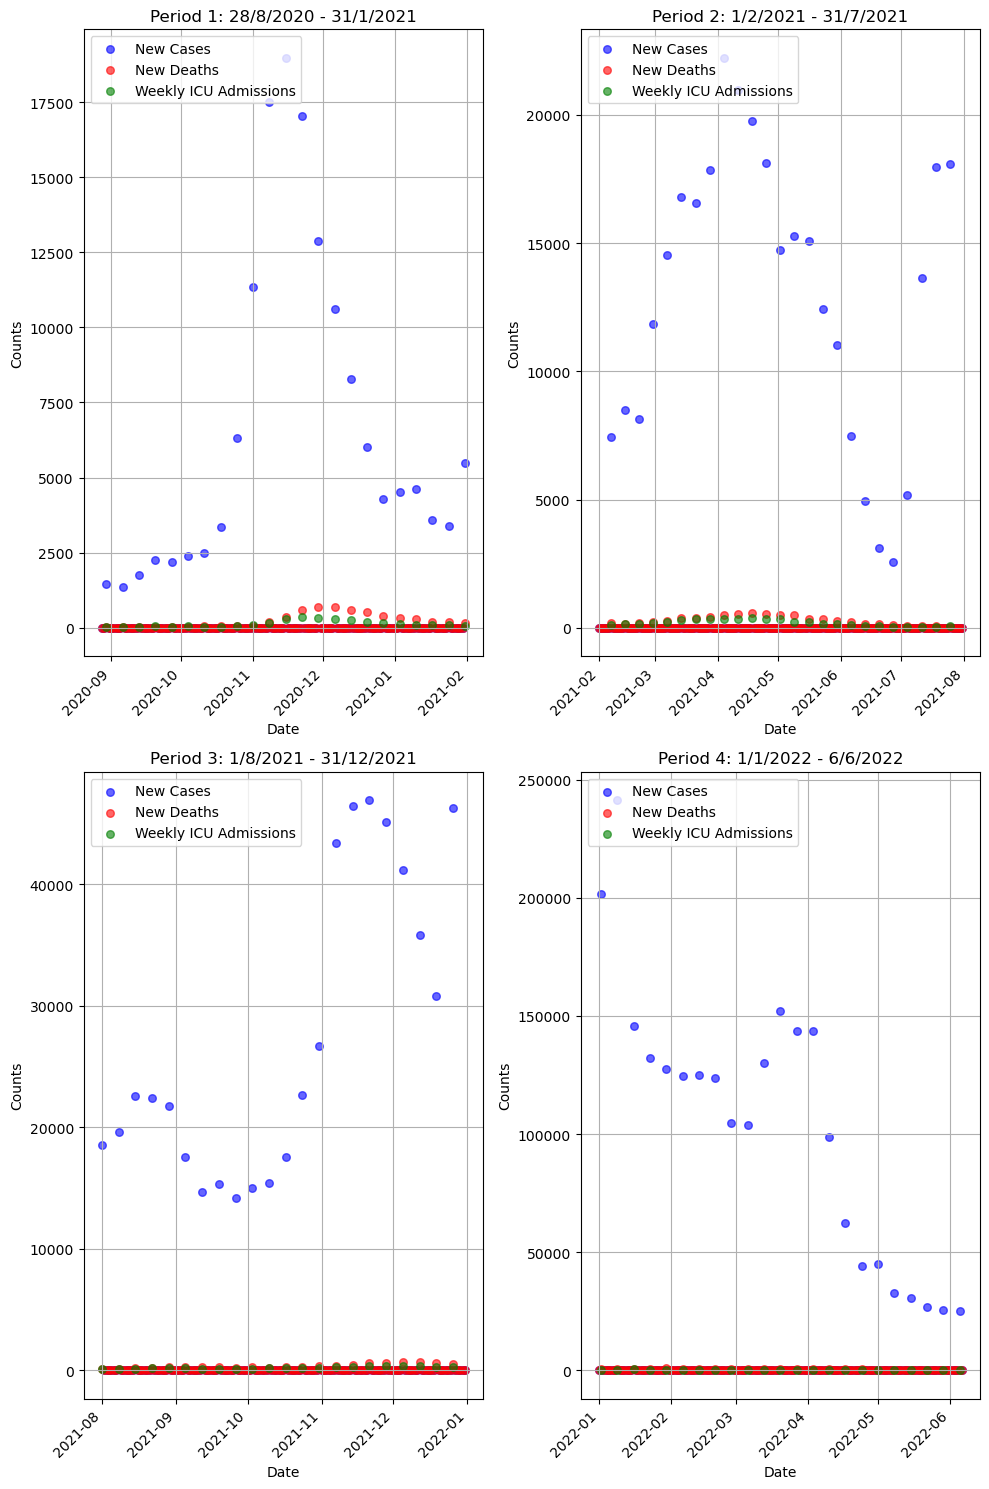

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods
periods = [
    ('2020-08-28', '2021-01-31'),
    ('2021-02-01', '2021-07-31'),
    ('2021-08-01', '2021-12-31'),
    ('2022-01-01', '2022-06-06')
]

# Create the subplots (2 rows and 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

# Titles for each period
titles = [
    'Period 1: 28/8/2020 - 31/1/2021',
    'Period 2: 1/2/2021 - 31/7/2021',
    'Period 3: 1/8/2021 - 31/12/2021',
    'Period 4: 1/1/2022 - 6/6/2022'
]

# Loop over each period to create the corresponding scatter plot
for i, (start_date, end_date) in enumerate(periods):
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Scatter plot for new_cases
    axs[i // 2, i % 2].scatter(period_df['date'], period_df['new_cases'], label='New Cases', color='blue', alpha=0.6, s=30)

    # Scatter plot for new_deaths
    axs[i // 2, i % 2].scatter(period_df['date'], period_df['new_deaths'], label='New Deaths', color='red', alpha=0.6, s=30)

    # Scatter plot for weekly_icu_admissions
    axs[i // 2, i % 2].scatter(period_df['date'], period_df['weekly_icu_admissions'], label='Weekly ICU Admissions', color='green', alpha=0.6, s=30)

    axs[i // 2, i % 2].set_ylabel('Counts')
    axs[i // 2, i % 2].set_title(titles[i])
    axs[i // 2, i % 2].grid(True)
    
    # Legend handling for the scatter plots
    axs[i // 2, i % 2].legend(loc='upper left')

# Set labels for the bottom plot's x-axis with rotation
for ax in axs.flat:
    ax.set_xlabel('Date')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout to ensure no overlap
plt.tight_layout()

# Show the plot
plt.show()


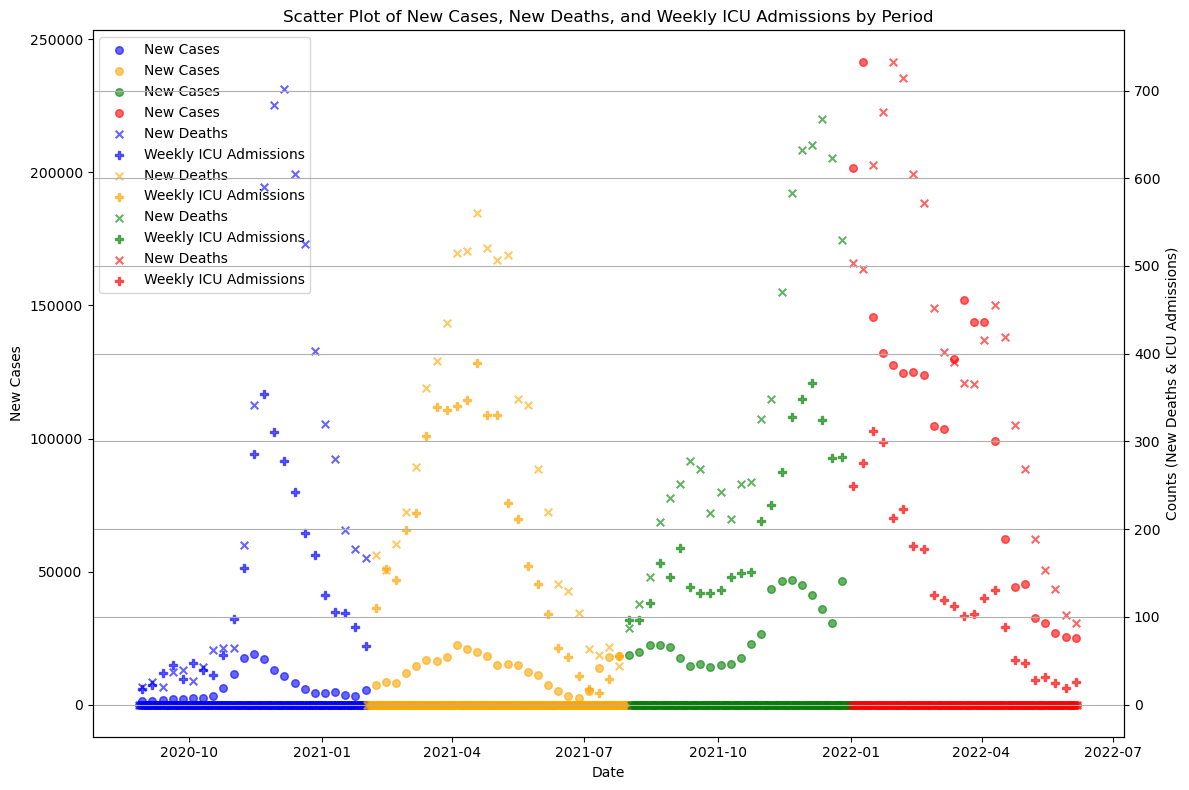

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods and colors
periods = [
    ('2020-08-28', '2021-01-31', 'blue'),   # Period 1
    ('2021-02-01', '2021-07-31', 'orange'), # Period 2
    ('2021-08-01', '2021-12-31', 'green'),  # Period 3
    ('2022-01-01', '2022-06-06', 'red')     # Period 4
]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Loop over each period to create the corresponding scatter plot
for start_date, end_date, color in periods:
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Scatter plot for new_cases on left y-axis
    ax1.scatter(period_df['date'], period_df['new_cases'], label='New Cases', color=color, alpha=0.6, s=30)

# Create a second y-axis for new_deaths and weekly_icu_admissions
ax2 = ax1.twinx()

for start_date, end_date, color in periods:
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Scatter plot for new_deaths on right y-axis
    ax2.scatter(period_df['date'], period_df['new_deaths'], label='New Deaths', color=color, alpha=0.6, s=30, marker='x')

    # Scatter plot for weekly_icu_admissions on right y-axis
    ax2.scatter(period_df['date'], period_df['weekly_icu_admissions'], label='Weekly ICU Admissions', color=color, alpha=0.6, s=30, marker='P')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='black')
ax2.set_ylabel('Counts (New Deaths & ICU Admissions)', color='black')
ax1.set_title('Scatter Plot of New Cases, New Deaths, and Weekly ICU Admissions by Period')
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


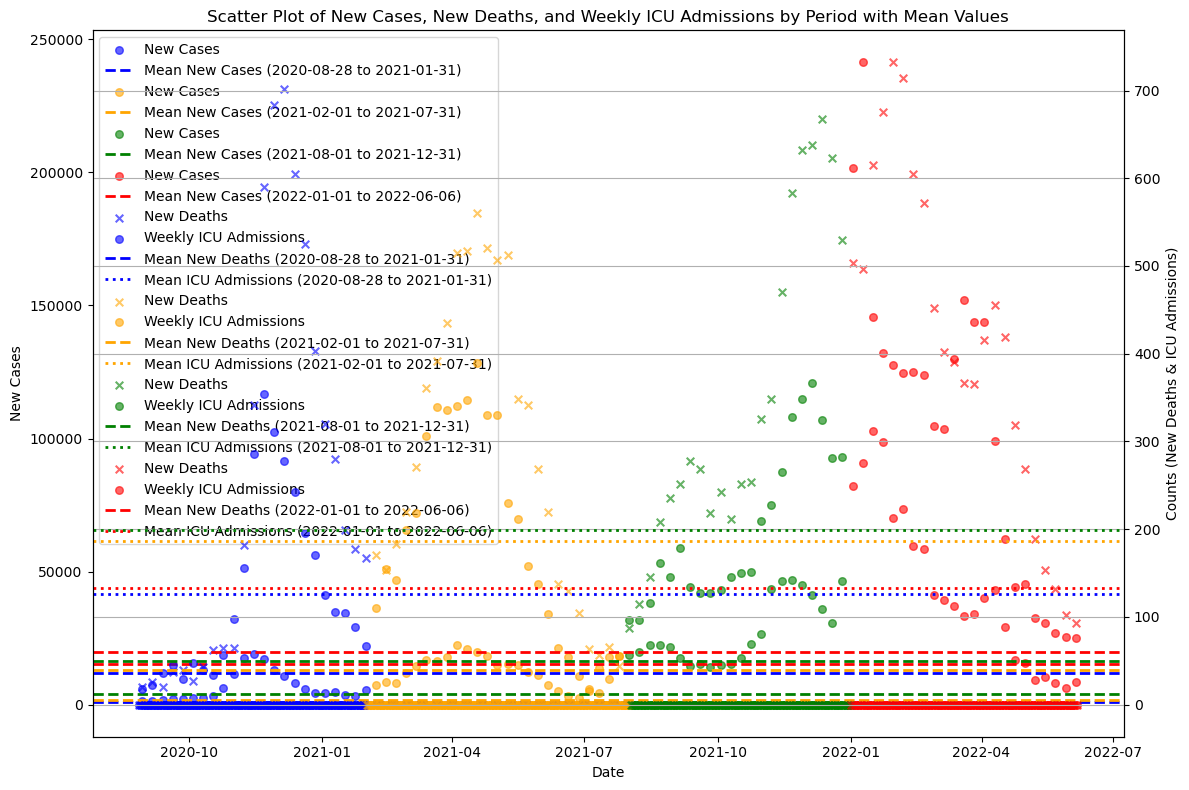

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods and colors
periods = [
    ('2020-08-28', '2021-01-31', 'blue'),   # Period 1
    ('2021-02-01', '2021-07-31', 'orange'), # Period 2
    ('2021-08-01', '2021-12-31', 'green'),  # Period 3
    ('2022-01-01', '2022-06-06', 'red')     # Period 4
]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Loop over each period to create the corresponding scatter plot
for start_date, end_date, color in periods:
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Scatter plot for new_cases on left y-axis
    ax1.scatter(period_df['date'], period_df['new_cases'], label='New Cases', color=color, alpha=0.6, s=30)

    # Calculate and plot the mean for new_cases
    mean_new_cases = period_df['new_cases'].mean()
    ax1.axhline(mean_new_cases, color=color, linestyle='--', linewidth=2, label=f'Mean New Cases ({start_date} to {end_date})')

# Create a second y-axis for new_deaths and weekly_icu_admissions
ax2 = ax1.twinx()

for start_date, end_date, color in periods:
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Scatter plot for new_deaths on right y-axis
    ax2.scatter(period_df['date'], period_df['new_deaths'], label='New Deaths', color=color, alpha=0.6, s=30, marker='x')

    # Scatter plot for weekly_icu_admissions on right y-axis
    ax2.scatter(period_df['date'], period_df['weekly_icu_admissions'], label='Weekly ICU Admissions', color=color, alpha=0.6, s=30, marker='o')

    # Calculate and plot the mean for new_deaths and weekly_icu_admissions
    mean_new_deaths = period_df['new_deaths'].mean()
    mean_weekly_icu = period_df['weekly_icu_admissions'].mean()
    
    ax2.axhline(mean_new_deaths, color=color, linestyle='--', linewidth=2, label=f'Mean New Deaths ({start_date} to {end_date})')
    ax2.axhline(mean_weekly_icu, color=color, linestyle=':', linewidth=2, label=f'Mean ICU Admissions ({start_date} to {end_date})')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='black')
ax2.set_ylabel('Counts (New Deaths & ICU Admissions)', color='black')
ax1.set_title('Scatter Plot of New Cases, New Deaths, and Weekly ICU Admissions by Period with Mean Values')
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


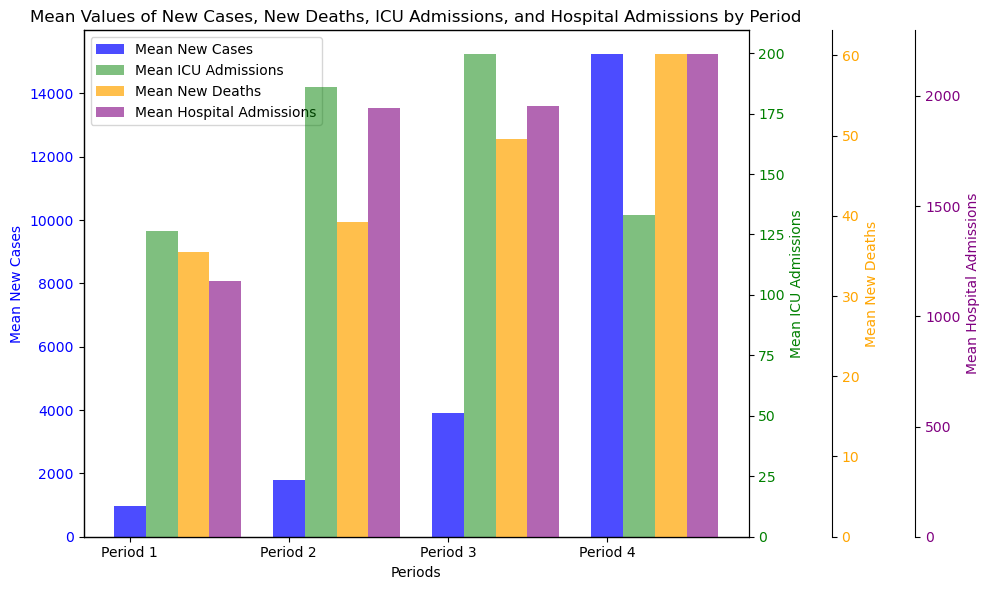

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods
periods = [
    ('2020-08-28', '2021-01-31'),
    ('2021-02-01', '2021-07-31'),
    ('2021-08-01', '2021-12-31'),
    ('2022-01-01', '2022-06-06')
]

# Prepare a DataFrame to hold the mean values for each period
mean_data = {
    'Period': [],
    'Mean New Cases': [],
    'Mean New Deaths': [],
    'Mean ICU Admissions': [],
    'Mean Hospital Admissions': []  # Added for weekly_hosp_admissions
}

# Loop over each period to calculate mean values
for i, (start_date, end_date) in enumerate(periods):
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Calculate means
    mean_new_cases = period_df['new_cases'].mean()
    mean_new_deaths = period_df['new_deaths'].mean()
    mean_weekly_icu = period_df['weekly_icu_admissions'].mean()
    mean_hospital_admissions = period_df['weekly_hosp_admissions'].mean()  # Calculate mean for hospital admissions
    
    # Append to the mean_data dictionary
    mean_data['Period'].append(f'Period {i+1}')
    mean_data['Mean New Cases'].append(mean_new_cases)
    mean_data['Mean New Deaths'].append(mean_new_deaths)
    mean_data['Mean ICU Admissions'].append(mean_weekly_icu)
    mean_data['Mean Hospital Admissions'].append(mean_hospital_admissions)  # Add hospital admissions

# Convert to DataFrame
mean_df = pd.DataFrame(mean_data)

# Create a bar plot with four axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Mean New Cases on the left y-axis
bar_width = 0.2  # Adjusted bar width
x = range(len(mean_df))

bars1 = ax1.bar(x, mean_df['Mean New Cases'], width=bar_width, label='Mean New Cases', color='blue', alpha=0.7)

# Set labels and title for the left axis
ax1.set_xlabel('Periods')
ax1.set_ylabel('Mean New Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Mean Values of New Cases, New Deaths, ICU Admissions, and Hospital Admissions by Period')
ax1.set_xticks(x)
ax1.set_xticklabels(mean_df['Period'])

# Create a second y-axis for Mean ICU Admissions
ax2 = ax1.twinx()
bars2 = ax2.bar([p + bar_width for p in x], mean_df['Mean ICU Admissions'], width=bar_width, label='Mean ICU Admissions', color='green', alpha=0.5)

# Set labels for the right axis
ax2.set_ylabel('Mean ICU Admissions', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create a third y-axis for Mean New Deaths
ax3 = ax1.twinx()
bars3 = ax3.bar([p + 2 * bar_width for p in x], mean_df['Mean New Deaths'], width=bar_width, label='Mean New Deaths', color='orange', alpha=0.7)

# Offset the third axis
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward
ax3.set_ylabel('Mean New Deaths', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Create a fourth y-axis for Mean Hospital Admissions
ax4 = ax1.twinx()
bars4 = ax4.bar([p + 3 * bar_width for p in x], mean_df['Mean Hospital Admissions'], width=bar_width, label='Mean Hospital Admissions', color='purple', alpha=0.6)

# Offset the fourth axis
ax4.spines['right'].set_position(('outward', 120))  # Move the fourth y-axis outward
ax4.set_ylabel('Mean Hospital Admissions', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# Show legends for all axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2 + lines_3 + lines_4, labels_1 + labels_2 + labels_3 + labels_4, loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


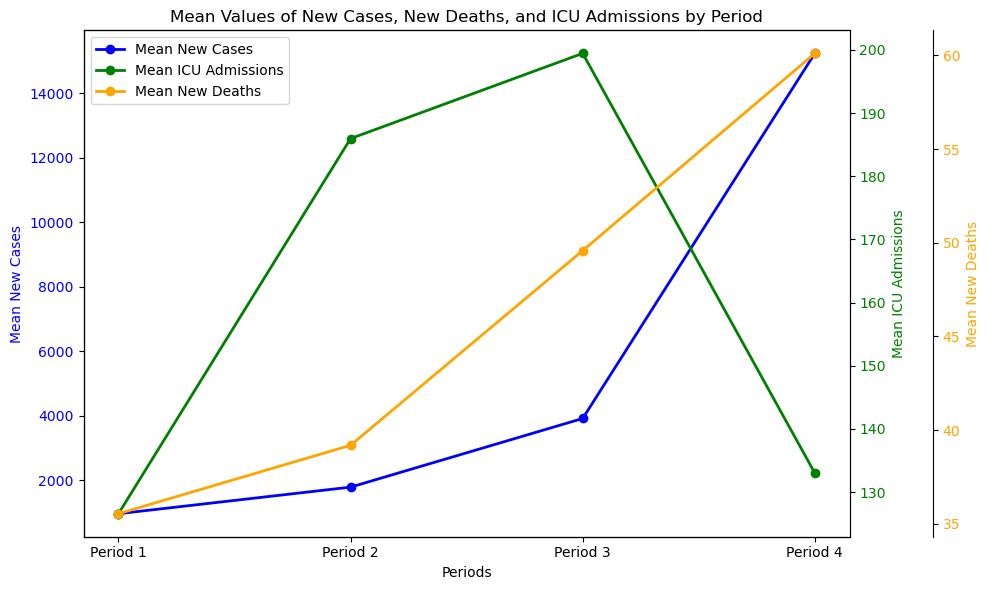

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods
periods = [
    ('2020-08-28', '2021-01-31'),
    ('2021-02-01', '2021-07-31'),
    ('2021-08-01', '2021-12-31'),
    ('2022-01-01', '2022-06-06')
]

# Prepare a DataFrame to hold the mean values for each period
mean_data = {
    'Period': [],
    'Mean New Cases': [],
    'Mean New Deaths': [],
    'Mean ICU Admissions': []
}

# Loop over each period to calculate mean values
for i, (start_date, end_date) in enumerate(periods):
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Calculate means
    mean_new_cases = period_df['new_cases'].mean()
    mean_new_deaths = period_df['new_deaths'].mean()
    mean_weekly_icu = period_df['weekly_icu_admissions'].mean()
    
    # Append to the mean_data dictionary
    mean_data['Period'].append(f'Period {i+1}')
    mean_data['Mean New Cases'].append(mean_new_cases)
    mean_data['Mean New Deaths'].append(mean_new_deaths)
    mean_data['Mean ICU Admissions'].append(mean_weekly_icu)

# Convert to DataFrame
mean_df = pd.DataFrame(mean_data)

# Create a plot with three axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plot for Mean New Cases on the left y-axis
x = range(len(mean_df))
ax1.plot(x, mean_df['Mean New Cases'], marker='o', label='Mean New Cases', color='blue', linewidth=2)

# Set labels and title for the left axis
ax1.set_xlabel('Periods')
ax1.set_ylabel('Mean New Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Mean Values of New Cases, New Deaths, and ICU Admissions by Period')
ax1.set_xticks(x)
ax1.set_xticklabels(mean_df['Period'])

# Create a second y-axis for Mean ICU Admissions
ax2 = ax1.twinx()
ax2.plot(x, mean_df['Mean ICU Admissions'], marker='o', label='Mean ICU Admissions', color='green', linewidth=2)

# Set labels for the right axis
ax2.set_ylabel('Mean ICU Admissions', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create a third y-axis for Mean New Deaths
ax3 = ax1.twinx()
ax3.plot(x, mean_df['Mean New Deaths'], marker='o', label='Mean New Deaths', color='orange', linewidth=2)

# Offset the third axis
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward
ax3.set_ylabel('Mean New Deaths', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Show legends for all axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


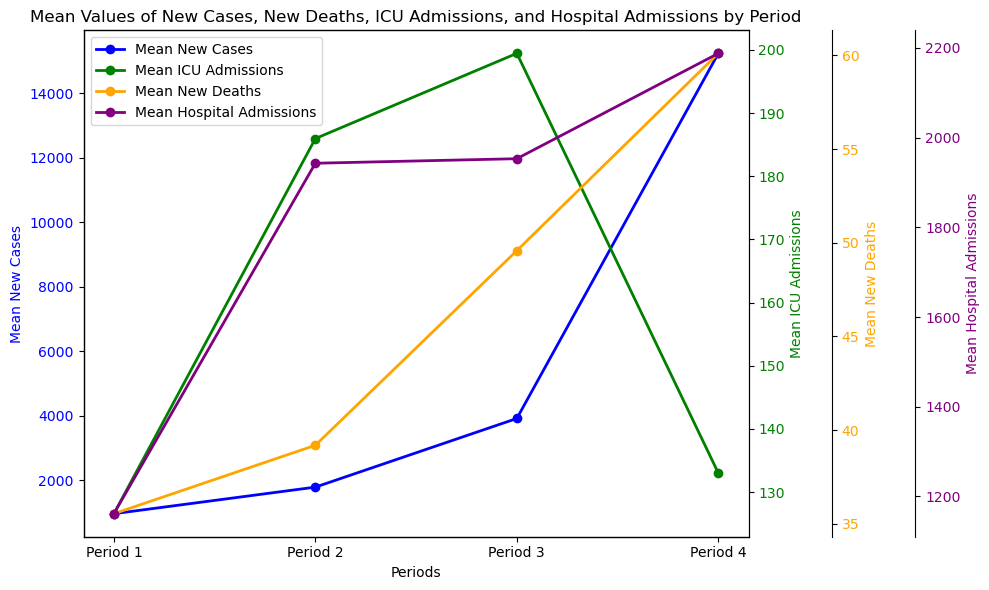

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods
periods = [
    ('2020-08-28', '2021-01-31'),
    ('2021-02-01', '2021-07-31'),
    ('2021-08-01', '2021-12-31'),
    ('2022-01-01', '2022-06-06')
]

# Prepare a DataFrame to hold the mean values for each period
mean_data = {
    'Period': [],
    'Mean New Cases': [],
    'Mean New Deaths': [],
    'Mean ICU Admissions': [],
    'Mean Hospital Admissions': []  # Added for weekly_hosp_admissions
}

# Loop over each period to calculate mean values
for i, (start_date, end_date) in enumerate(periods):
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Calculate means
    mean_new_cases = period_df['new_cases'].mean()
    mean_new_deaths = period_df['new_deaths'].mean()
    mean_weekly_icu = period_df['weekly_icu_admissions'].mean()
    mean_hospital_admissions = period_df['weekly_hosp_admissions'].mean()  # Calculate mean for hospital admissions
    
    # Append to the mean_data dictionary
    mean_data['Period'].append(f'Period {i+1}')
    mean_data['Mean New Cases'].append(mean_new_cases)
    mean_data['Mean New Deaths'].append(mean_new_deaths)
    mean_data['Mean ICU Admissions'].append(mean_weekly_icu)
    mean_data['Mean Hospital Admissions'].append(mean_hospital_admissions)  # Add hospital admissions

# Convert to DataFrame
mean_df = pd.DataFrame(mean_data)

# Create a plot with four axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plot for Mean New Cases on the left y-axis
x = range(len(mean_df))
ax1.plot(x, mean_df['Mean New Cases'], marker='o', label='Mean New Cases', color='blue', linewidth=2)

# Set labels and title for the left axis
ax1.set_xlabel('Periods')
ax1.set_ylabel('Mean New Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Mean Values of New Cases, New Deaths, ICU Admissions, and Hospital Admissions by Period')
ax1.set_xticks(x)
ax1.set_xticklabels(mean_df['Period'])

# Create a second y-axis for Mean ICU Admissions
ax2 = ax1.twinx()
ax2.plot(x, mean_df['Mean ICU Admissions'], marker='o', label='Mean ICU Admissions', color='green', linewidth=2)

# Set labels for the right axis
ax2.set_ylabel('Mean ICU Admissions', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create a third y-axis for Mean New Deaths
ax3 = ax1.twinx()
ax3.plot(x, mean_df['Mean New Deaths'], marker='o', label='Mean New Deaths', color='orange', linewidth=2)

# Offset the third axis
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward
ax3.set_ylabel('Mean New Deaths', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Create a fourth y-axis for Mean Hospital Admissions
ax4 = ax1.twinx()
ax4.plot(x, mean_df['Mean Hospital Admissions'], marker='o', label='Mean Hospital Admissions', color='purple', linewidth=2)

# Offset the fourth axis
ax4.spines['right'].set_position(('outward', 120))  # Move the fourth y-axis outward
ax4.set_ylabel('Mean Hospital Admissions', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# Show legends for all axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2 + lines_3 + lines_4, labels_1 + labels_2 + labels_3 + labels_4, loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


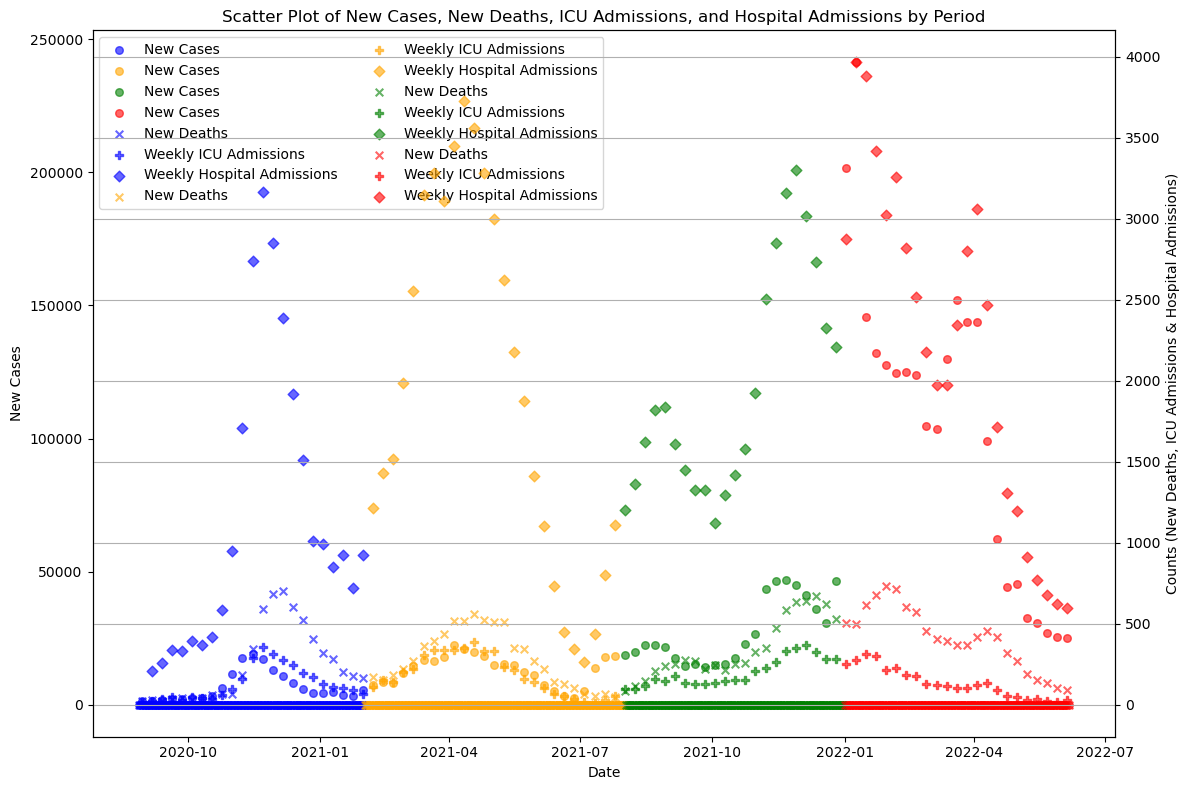

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load your data into the DataFrame
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "paper_host_dynamics", "owid-covid-data.xlsx")
df = pd.read_excel(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define date ranges for the four periods and colors
periods = [
    ('2020-08-28', '2021-01-31', 'blue'),   # Period 1
    ('2021-02-01', '2021-07-31', 'orange'), # Period 2
    ('2021-08-01', '2021-12-31', 'green'),  # Period 3
    ('2022-01-01', '2022-06-06', 'red')     # Period 4
]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Loop over each period to create the corresponding scatter plot for new cases
for start_date, end_date, color in periods:
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Scatter plot for new cases on left y-axis
    ax1.scatter(period_df['date'], period_df['new_cases'], label='New Cases', color=color, alpha=0.6, s=30)

# Create a second y-axis for new deaths, weekly ICU admissions, and weekly hospital admissions
ax2 = ax1.twinx()

for start_date, end_date, color in periods:
    # Filter the DataFrame for the current period
    period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Scatter plot for new deaths on right y-axis
    ax2.scatter(period_df['date'], period_df['new_deaths'], label='New Deaths', color=color, alpha=0.6, s=30, marker='x')

    # Scatter plot for weekly ICU admissions on right y-axis
    ax2.scatter(period_df['date'], period_df['weekly_icu_admissions'], label='Weekly ICU Admissions', color=color, alpha=0.6, s=30, marker='P')
    
    # Scatter plot for weekly hospital admissions on right y-axis
    ax2.scatter(period_df['date'], period_df['weekly_hosp_admissions'], label='Weekly Hospital Admissions', color=color, alpha=0.6, s=30, marker='D')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='black')
ax2.set_ylabel('Counts (New Deaths, ICU Admissions & Hospital Admissions)', color='black')
ax1.set_title('Scatter Plot of New Cases, New Deaths, ICU Admissions, and Hospital Admissions by Period')
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', ncol=2)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()
